In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")
# Combine the data into a single dataset
city_ride_data_df = pd.merge(city_data, ride_data)
city_ride_data_df.head()
# Display the data table for preview


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


Text(0, 0.5, 'Average Fare by City Type')

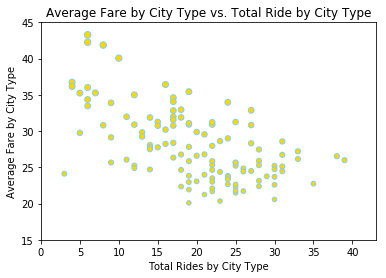

In [6]:
# Obtain the x and y coordinates for each of the three city 
total_ride_by_city_type = city_ride_data_df.groupby(["type", "city"])["ride_id"].count()
total_ride_by_city_type.head()

avg_fare_by_city_type = city_ride_data_df.groupby(["type", "city"])["fare"].mean()
avg_fare_by_city_type.head()

x_axis = total_ride_by_city_type
y_axis = avg_fare_by_city_type

plt.xlim(0,43)
plt.ylim(15,45)

plt.scatter(x_axis, y_axis,s=y_axis, facecolors="gold",edgecolors="skyblue")

plt.title("Average Fare by City Type vs. Total Ride by City Type")
plt.xlabel("Total Rides by City Type")
plt.ylabel("Average Fare by City Type")



In [108]:
avg_fare_by_city_type = city_ride_data_df.groupby(["type"])["fare"].mean()
avg_fare_by_city_type.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [113]:
drivers = city_ride_data_df["driver_count"].count()
drivers
percent_drivers = city_ride_data_df.groupby(["type"])["driver_count"].count()/drivers *100
percent_drivers





type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: driver_count, dtype: float64

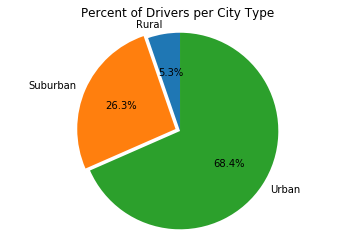

In [114]:
type = ["Rural", "Suburban", "Urban"]
colors = ["skyblue", "coral", "gold"]
explode = (0, 0.05, 0)
plt.title("Percent of Drivers per City Type")
plt.pie(percent_drivers, labels=type, explode=explode, autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.show()


In [116]:
#Observable Trends
#1. Although rides in rural areas make up the least percentage of rides, the average fair is more than $10 more
#that of an Urban ride.
#2. The average fare decreases in areas with more drivers
#3. This ridesharing service is far more popular in suburban areas, most likely due to the availabilty of more
#drivers. 